In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skmob
from skmob.tessellation import tilers
from skmob.measures.individual import distance_straight_line, maximum_distance, number_of_visits, waiting_times, real_entropy
import math
from tqdm import tqdm
from numpy.linalg import norm
import traja
from scipy.stats import ks_2samp
import folium
from datetime import datetime
from skmob.models.epr import DensityEPR
import geopandas as gpd


/home/ryn/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [73]:
dat = pd.read_csv("Minute_Trajectories.csv")
dat['angles'] = traja.trajectory.calc_angle(dat)

In [74]:
print(np.shape(dat))

(3559500, 28)


In [75]:
def sample_angle_unif():
    return np.random.uniform(low=0, high=2*np.pi)

def sample_angle_data():
    return dat.sample(n=1)['angles']#math.radians(dat.sample(n=1)['angles'])

def sample_angle_norm():
    return np.random.normal(45,15)

In [83]:
def sample_length_unif():
    return np.random.uniform(low=0, high = 1)
def sample_length_data():
    ind = np.random.randint(np.shape(dat)[0])
    if(ind > 0):
        d1 = dat.iloc[ind]
        d2 = dat.iloc[ind-1]
        d = np.sqrt((d1['x']-d2['x'])**2 + (d1['y']-d2['y'])**2)
    else:
        d = 0
    return d

In [77]:
def sample_rw(n=1500,x=0,y=0, a="unif",l="unif"):
    traj = np.zeros((n,2))
    for i in tqdm(range(1,n)):
        if(a == "unif"):
            an  = sample_angle_unif()
        elif(a == "data"):
            an = sample_angle_data()
        elif(a == "norm"):
            an = sample_angle_norm()
        else:
            print("Unknown Option for a")
        if(l == "unif"):
            ln = sample_length_unif()
        elif(l == "data"):
            ln = sample_length_data()
        else:
            print("Unknown Option for l")
        x1 = traj[i-1][0] + ln * np.cos(an)
        y1 = traj[i-1][1] + ln * np.sin(an)
        traj[i]=[x1,y1]
    return traj
        

100%|██████████| 1499/1499 [00:00<00:00, 91411.19it/s]


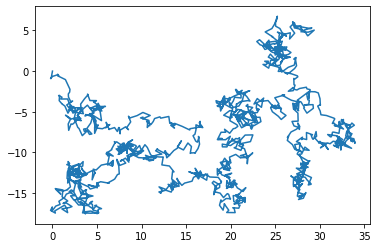

In [78]:
traj = sample_rw()

plt.plot(traj[:,0],traj[:,1])

100%|██████████| 1499/1499 [00:00<00:00, 87160.86it/s]


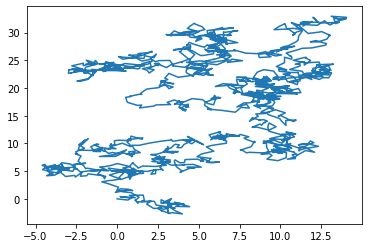

In [85]:
traj = sample_rw(a = "norm")

plt.plot(traj[:,0],traj[:,1])

100%|██████████| 1499/1499 [04:01<00:00,  6.20it/s]


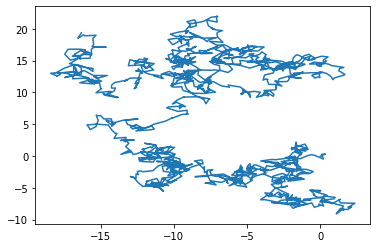

In [79]:
traj = sample_rw(a = "data")

plt.plot(traj[:,0],traj[:,1])

100%|██████████| 1499/1499 [03:30<00:00,  7.12it/s]


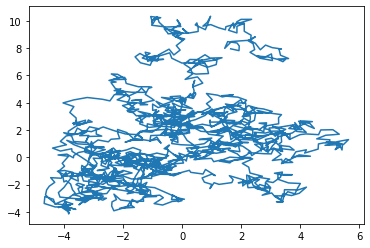

In [86]:
traj = sample_rw(a="data",l="data")

plt.plot(traj[:,0],traj[:,1])